## **Customer Segmentation**

## Recency, Frequency, Monetary (RFM) Analysis

**Customer segmentation** is a crucial marketing tool that allows businesses to understand their target audience better. By segmenting customers, businesses can gain insights into their behaviors and tailor marketing efforts and communications more effectively for each segment.

### What is RFM Analysis?

RFM analysis is a technique used to segment customers based on three key factors:

1. **Recency (R)**: How recently a customer made their last purchase. This is measured by the difference between the date of their last purchase and the current date.
  
2. **Frequency (F)**: How often a customer makes a purchase. This counts the total number of transactions made by each customer.
  
3. **Monetary (M)**: How much a customer has spent. This measures the total spending of each customer over a specific period.

By evaluating these three factors, businesses can categorize customers into segments, enabling more personalized marketing strategies and customer relationship management.

In [121]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
pd.set_option('display.max_columns', None)

In [124]:
df = pd.read_csv(r"D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\cleaned_df.csv")

In [125]:
df

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
2      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
3      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
4      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
...                                 ...                               ...   
87783  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
87784  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
87785  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
87786  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
87787  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

                     customer_unique_id  order_purchase_date order_status  \
0      7c396fd4830fd04220f754e42b4e5bff  2017-10-02 10:56:33    delivered   
1      7c142cf63193a1473d2e66489a9ae977  2017-11-18 19:28:06    delivered   
2      72632f0f9dd73dfee390c9b22eb56dd6  2018-02-13 21:18:39    delivered   
3      80bb27c7c16e8f973207a5086ab329e2  2017-07-09 21:57:05    delivered   
4      36edbb3fb164b1f16485364b6fb04c73  2017-04-11 12:22:08     invoiced   
...                                 ...                  ...          ...   
87783  6359f309b166b0196dbf7ad2ac62bb5a  2017-03-09 09:54:05    delivered   
87784  da62f9e57a76d978d02ab5362c509660  2018-02-06 12:58:58    delivered   
87785  737520a9aad80b3fbbdad19b66b37b30  2017-08-27 14:46:43    delivered   
87786  5097a5312c8b157bb7be58ae360ef43c  2018-01-08 21:28:27    delivered   
87787  60350aa974b26ff12caad89e55993bd6  2018-03-08 20:57:30    delivered   

      order_estimated_delivery_date order_delivered_customer_date  \
0                        2017-10-18           2017-10-10 21:25:13   
1                        2017-12-15           2017-12-02 00:28:42   
2                        2018-02-26           2018-02-16 18:17:02   
3                        2017-08-01           2017-07-26 10:57:55   
4                        2017-05-09           2017-05-09 00:00:00   
...                             ...                           ...   
87783                    2017-03-28           2017-03-17 15:08:01   
87784                    2018-03-02           2018-02-28 17:37:56   
87785                    2017-09-27           2017-09-21 11:24:17   
87786                    2018-02-15           2018-01-25 23:32:54   
87787                    2018-04-03           2018-03-16 13:08:30   

       total_payment_value  total_installments        payment_types  \
0                    38.71                   3  credit_card+voucher   
1                    72.20                   1          credit_card   
2                    28.62                   1          credit_card   
3                   175.26                   6          credit_card   
4                    65.95                   1          credit_card   
...                    ...                 ...                  ...   
87783                85.08                   3          credit_card   
87784               195.00                   3          credit_card   
87785               271.01                   5          credit_card   
87786               441.16                   4          credit_card   
87787                86.86                   1           debit_card   

       customer_zip_code_prefix            customer_city customer_state  \
0                          3149                sao paulo             SP   
1                         59296  sao goncalo do amarante             RN   
2                          9195              santo andre             SP   
3                         86320             congonhinhas             PR   
4                         98900               santa rosa             RS   
...                         ...                  

In [126]:
df.dtypes

order_id                          object
customer_id                       object
customer_unique_id                object
order_purchase_date               object
order_status                      object
order_estimated_delivery_date     object
order_delivered_customer_date     object
total_payment_value              float64
total_installments                 int64
payment_types                     object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
price                            float64
freight_value                    float64
product_category_name_english     object
seller_id                         object
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
review_id                         object
review_score                     float64
review_creation_

In [127]:
# Handle any non-standard formats and convert to datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])

In [128]:
df.dtypes

order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_date              datetime64[ns]
order_status                             object
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
total_payment_value                     float64
total_installments                        int64
payment_types                            object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_id                                object
seller_zip_code_prefix                    int64
seller_city                             

In [129]:
# get our last order transaction
last= df['order_purchase_date'].max()
last


Timestamp('2018-06-30 23:59:49')

In [130]:
#observed day = + 1 days since last transactions
timebound = last + timedelta(days=1)
timebound

Timestamp('2018-07-01 23:59:49')

In [131]:
# total unique customer id
df['customer_unique_id'].nunique()

81861

In [132]:
#calculate RFM metrics
df_rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_date' : lambda x : (timebound- x.max()).days,
    'order_id' : 'nunique',
    'total_payment_value' : 'sum'})

In [133]:
#rename the column for easy interpretation
df_rfm.reset_index(inplace=True)
df_rfm.rename(columns= {'order_purchase_date': 'Recency',
                        'order_id': 'Frequency',
                        'total_payment_value': 'Monetary Value'},inplace= True)

In [134]:
df_rfm

customer_unique_id  Recency  Frequency  Monetary Value
0      0000366f3b9a7992bf8c76cfdf3221e2       52          1          141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f       55          1           27.19
2      0000f46a3911fa3c0805444483337064      478          1           86.22
3      0000f6ccb0745a6a4b88665a16c9f078      262          1           43.62
4      0004aac84e0df4da2b147fca70cf8255      229          1          196.89
...                                 ...      ...        ...             ...
81856  fffcf5a5ff07b0908bd4e2dbc735a684      388          1         4134.84
81857  fffea47cd6d3cc0a88bd621562a9d061      203          1           84.58
81858  ffff371b4d645b6ecea244b27531430a      509          1          112.46
81859  ffff5962728ec6157033ef9805bacc48       60          1          133.69
81860  ffffd2657e2aad2907e67c3e9daecbeb      425          1           71.56

[81861 rows x 4 columns]

In [135]:
rfm= df_rfm[['Recency', 'Frequency', 'Monetary Value']]
rfm

Recency  Frequency  Monetary Value
0           52          1          141.90
1           55          1           27.19
2          478          1           86.22
3          262          1           43.62
4          229          1          196.89
...        ...        ...             ...
81856      388          1         4134.84
81857      203          1           84.58
81858      509          1          112.46
81859       60          1          133.69
81860      425          1           71.56

[81861 rows x 3 columns]

<Axes: xlabel='Recency', ylabel='Monetary Value'>

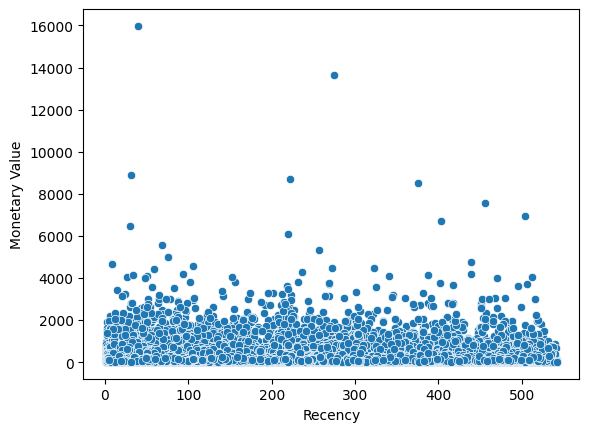

In [136]:
sns.scatterplot(rfm, x ="Recency",y= 'Monetary Value' )

In [137]:
rfm1= rfm.copy()
rfm1

Recency  Frequency  Monetary Value
0           52          1          141.90
1           55          1           27.19
2          478          1           86.22
3          262          1           43.62
4          229          1          196.89
...        ...        ...             ...
81856      388          1         4134.84
81857      203          1           84.58
81858      509          1          112.46
81859       60          1          133.69
81860      425          1           71.56

[81861 rows x 3 columns]

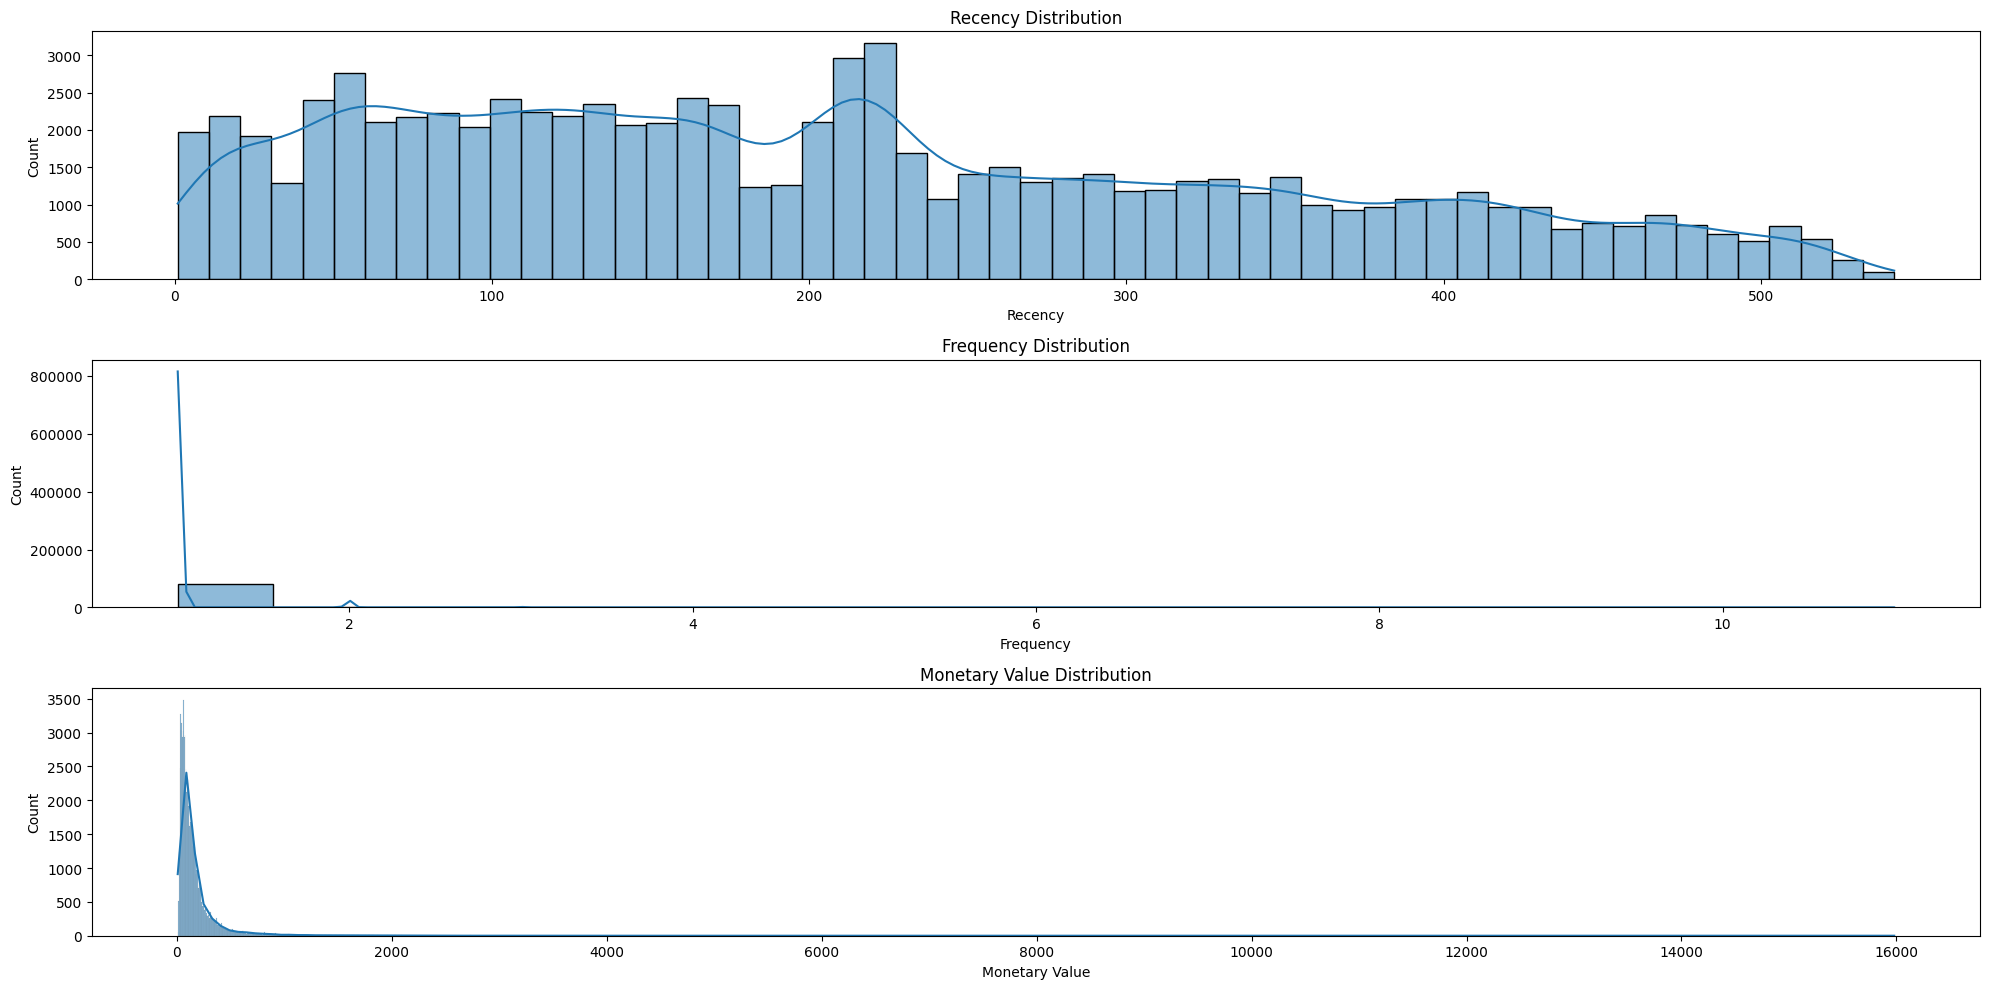

In [138]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

# Plotting Recency distribution
sns.histplot(rfm1['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')

# Plotting Frequency distribution
sns.histplot(rfm1['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')

# Plotting Monetary Value distribution
sns.histplot(rfm1['Monetary Value'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Value Distribution')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


From the chart above, we can observe that the variable is skewed. To address this, we will apply a log transformation to unskew only the monetary value.

In [139]:
#unskew the data with data transformations
rfm1['Monetary Value']= np.log(rfm1['Monetary Value'])

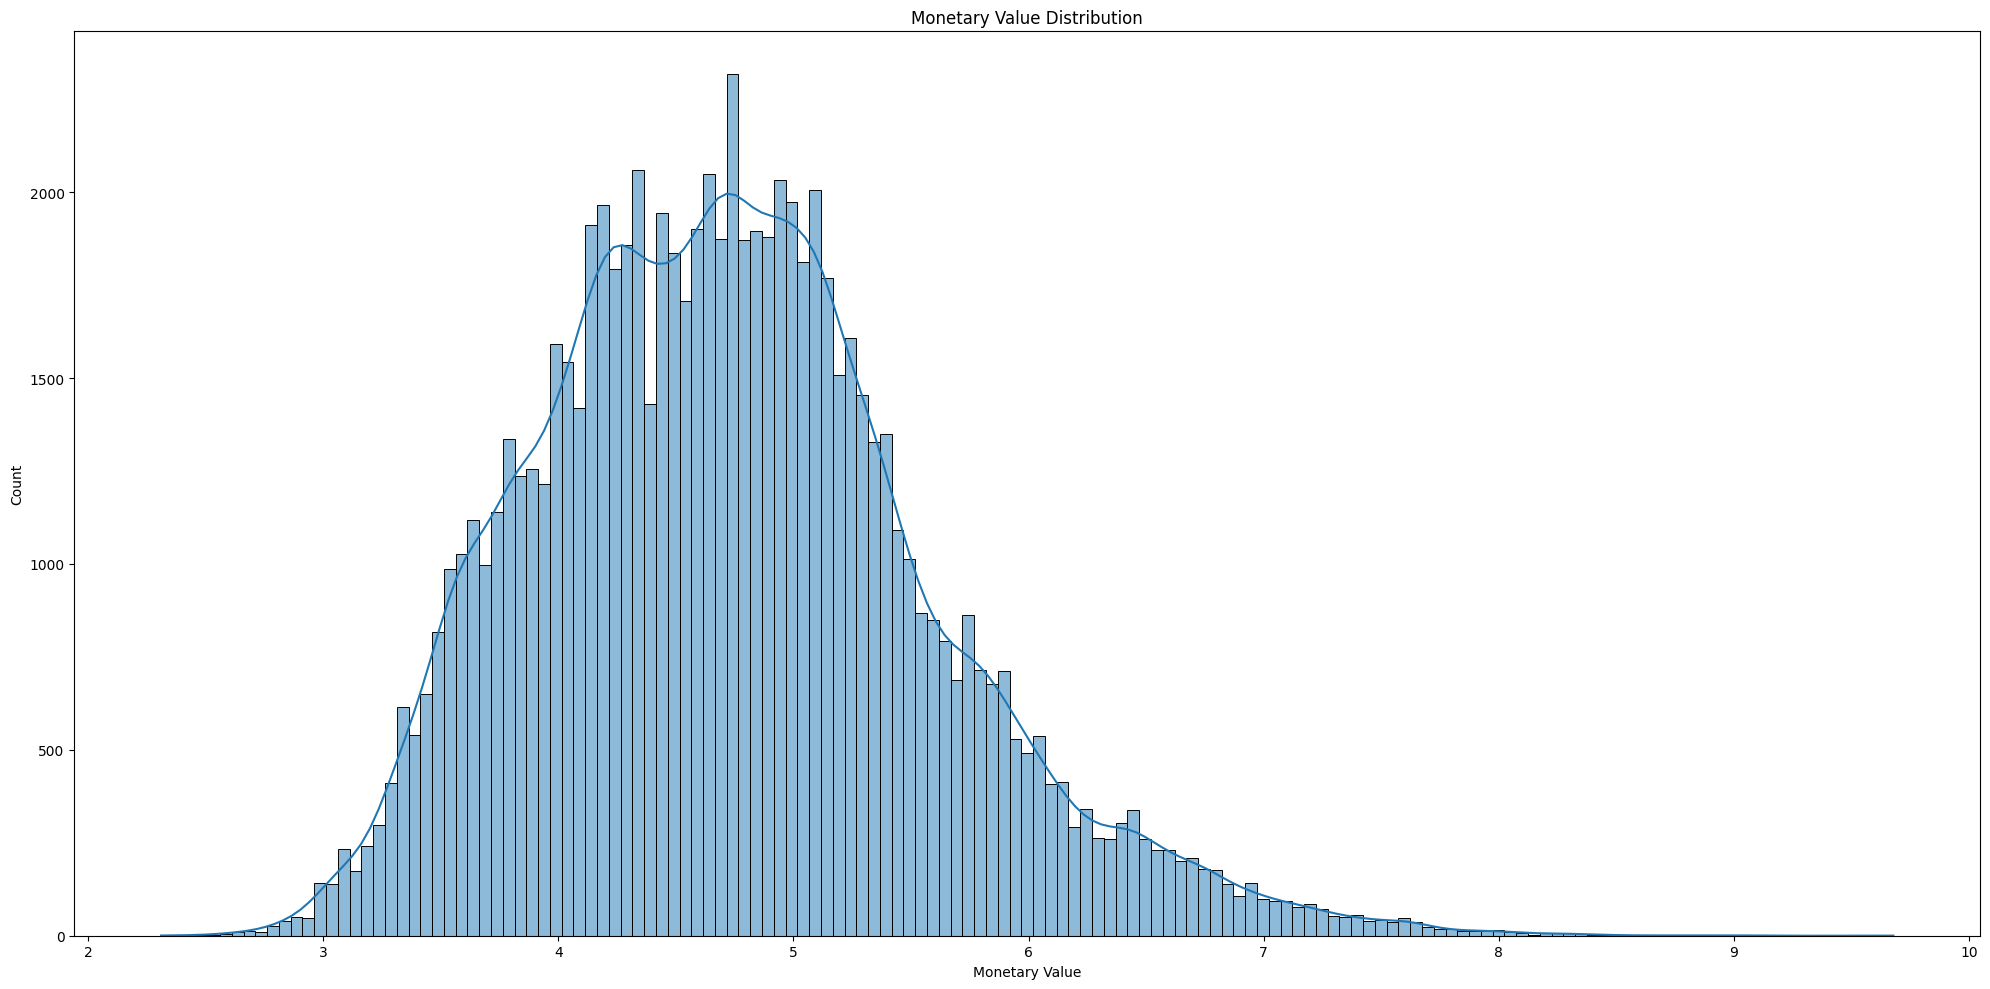

In [140]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting Monetary Value distribution
sns.histplot(rfm1['Monetary Value'], kde=True, ax=ax)
ax.set_title('Monetary Value Distribution')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [141]:
rfm1

Recency  Frequency  Monetary Value
0           52          1        4.955123
1           55          1        3.302849
2          478          1        4.456902
3          262          1        3.775516
4          229          1        5.282645
...        ...        ...             ...
81856      388          1        8.327204
81857      203          1        4.437698
81858      509          1        4.722598
81859       60          1        4.895524
81860      425          1        4.270536

[81861 rows x 3 columns]

In [142]:
# copy of log transformation
df_log = rfm1.copy()

In [143]:
#using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)
#normalize the variables
df_normalized = scaler.transform(df_log)

In [144]:
# store for clustering
df_normalized = pd.DataFrame(data= df_normalized, index= rfm1.index, columns = rfm1.columns)
df_normalized

Recency  Frequency  Monetary Value
0     -1.148733  -0.160969        0.251530
1     -1.126834  -0.160969       -1.704417
2      1.960900  -0.160969       -0.338259
3      0.384185  -0.160969       -1.144879
4      0.143298  -0.160969        0.639249
...         ...        ...             ...
81856  1.303936  -0.160969        4.243372
81857 -0.046492  -0.160969       -0.360993
81858  2.187188  -0.160969       -0.023731
81859 -1.090336  -0.160969        0.180977
81860  1.574021  -0.160969       -0.558878

[81861 rows x 3 columns]

To determine clusters we will use :
- Elbow Method

#### Elbow Method

In [145]:
#Fit k-means and calculate SSE for eack k
wcss= {}
for k in range(1,7):
  kmeans= KMeans(n_clusters=k,init= "k-means++")
  kmeans.fit(df_normalized)
  wcss[k] = kmeans.inertia_


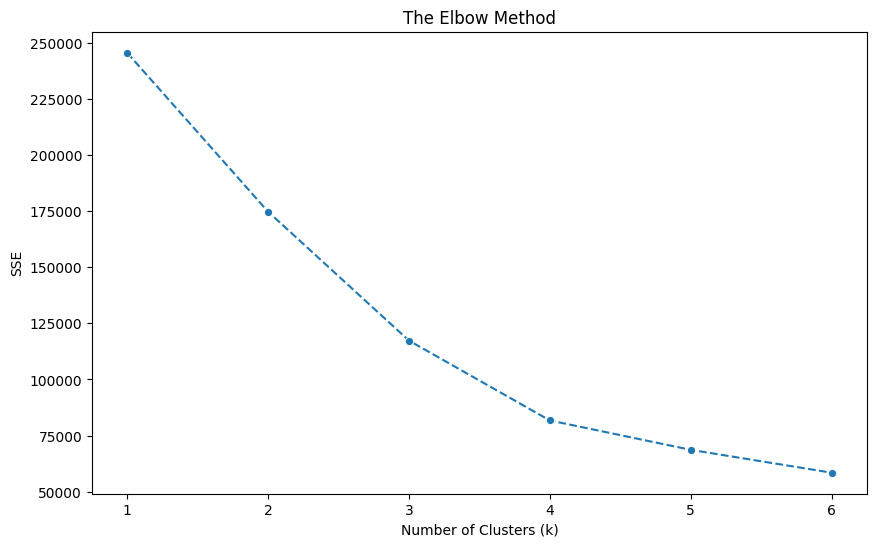

{1: 245583.00000000084, 2: 174773.17661191878, 3: 117322.38557740254, 4: 81743.63656460475, 5: 68645.15614207371, 6: 58450.91475573313}


In [146]:
# Create a DataFrame from the SSE dictionary
sse_df = pd.DataFrame({
    'Number of Clusters': list(wcss.keys()),
    'SSE': list(wcss.values())
})

# Plot SSE for each k using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=sse_df, x='Number of Clusters', y='SSE', marker='o', linestyle='--')

# Customize plot
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(ticks=sse_df['Number of Clusters'])  # Ensure all k values are shown on x-axis

# Show the plot
plt.show()

# Print the SSE values
print(wcss)


In [147]:
# !pip install kneed

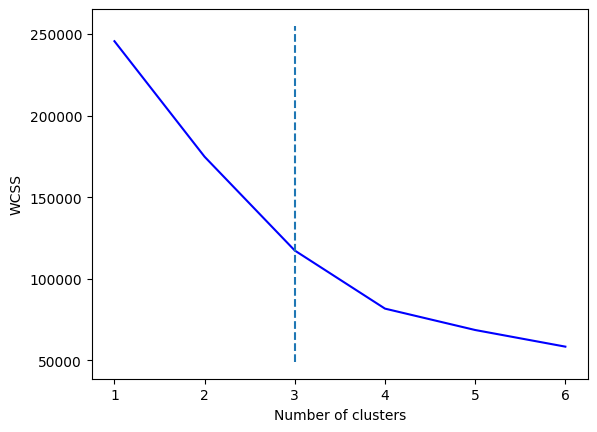

In [148]:
from kneed import KneeLocator
# Extract keys and values
x = list(wcss.keys())
y = list(wcss.values())

# Create the KneeLocator instance
kl = KneeLocator(x, y, curve="convex", direction="decreasing")

# Plot the results to check
plt.plot(x, y, 'b-')
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
kl.elbow

3

### Elbow Method for Determining Optimal Clusters

The plot above illustrates the Sum of Squared Errors (SSE) for different numbers of clusters. As the number of clusters increases, the SSE decreases, indicating improved clustering. The "elbow" point, where the rate of decrease slows significantly, suggests the optimal number of clusters. Based on the plot:

- **3 Clusters**: Provides a good balance between reducing SSE and maintaining simplicity.
- **4 Clusters**: Offers slightly more granularity with diminished additional improvements in SSE.

Choosing between 3 and 4 clusters depends on the desired balance between model simplicity and detail.


# Applying K-Means Clustering

In [150]:
kmeans = KMeans(n_clusters=3,random_state= 5)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_

In [151]:
len(cluster_labels)

81861

In [152]:
len(df_rfm)

81861

In [153]:
#assign the label to raw data
df_rfm['Cluster'] = cluster_labels

In [154]:
df_rfm

customer_unique_id  Recency  Frequency  Monetary Value  \
0      0000366f3b9a7992bf8c76cfdf3221e2       52          1          141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       55          1           27.19   
2      0000f46a3911fa3c0805444483337064      478          1           86.22   
3      0000f6ccb0745a6a4b88665a16c9f078      262          1           43.62   
4      0004aac84e0df4da2b147fca70cf8255      229          1          196.89   
...                                 ...      ...        ...             ...   
81856  fffcf5a5ff07b0908bd4e2dbc735a684      388          1         4134.84   
81857  fffea47cd6d3cc0a88bd621562a9d061      203          1           84.58   
81858  ffff371b4d645b6ecea244b27531430a      509          1          112.46   
81859  ffff5962728ec6157033ef9805bacc48       60          1          133.69   
81860  ffffd2657e2aad2907e67c3e9daecbeb      425          1           71.56   

       Cluster  
0            1  
1            1  
2            0  
3            0  
4            1  
...        ...  
81856        0  
81857        1  
81858        0  
81859        1  
81860        0  

[81861 rows x 5 columns]

In [155]:
fig = px.scatter(df_rfm, x='Recency', y='Monetary Value', color='Cluster',
                 title='Customer Segmentation based on RFM Analysis',
                 labels={'Recency': 'Recency (Days)', 'Monetary Value': 'Monetary Value'})

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.show()

In [156]:
result = df_rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary Value']].agg(['mean', 'median'])
result

Recency        Frequency        Monetary Value         
               mean median      mean median           mean   median
Cluster                                                            
0        364.885788  355.0  1.000000    1.0     171.454469  105.035
1        122.276798  122.0  1.000000    1.0     169.356588  107.850
2        193.521190  169.0  2.113284    2.0     346.549002  231.165

### Customer Segmentation Based on RFM Analysis

**Cluster 0: Recent Low Spenders**
- **Recency:** Customers have purchased recently.
- **Frequency:** Customers purchase infrequently.
- **Monetary Value:** Customers spend relatively less.

**Cluster 1: Frequent High Spenders**
- **Recency:** Customers have not purchased recently.
- **Frequency:** Customers make frequent purchases.
- **Monetary Value:** Customers spend a lot.

**Cluster 2: Inactive Low Spenders**
- **Recency:** Customers have not purchased in a long time.
- **Frequency:** Customers purchase infrequently.
- **Monetary Value:** Customers spend relatively less.


### Insights and Recommendations Based on RFM Analysis

#### **1. Cluster 0: Recent Low Spenders**

**Insights:**
- **Recency:** Recent purchases indicate current engagement.
- **Frequency:** Low purchase frequency suggests potential for growth.
- **Monetary Value:** Relatively low spending compared to other clusters.

**Recommendations:**
- **Targeted Promotions:** Offer discounts or promotions to encourage more frequent purchases.
- **Personalized Offers:** Provide recommendations based on recent purchases to increase spend per visit.
- **Loyalty Programs:** Introduce loyalty rewards to boost retention and frequency.

#### **2. Cluster 1: Frequent High Spenders**

**Insights:**
- **Recency:** Recent inactivity but high past engagement.
- **Frequency:** Frequent purchases demonstrate strong loyalty.
- **Monetary Value:** High spenders, indicating willingness to invest.

**Recommendations:**
- **Re-Engagement Campaigns:** Use exclusive offers or new product launches to rekindle interest.
- **VIP Programs:** Implement a VIP loyalty program with special privileges.
- **Upsell and Cross-Sell:** Utilize their purchase history to offer complementary products.

#### **3. Cluster 2: Inactive Low Spenders**

**Insights:**
- **Recency:** Long period of inactivity.
- **Frequency:** Rare purchases, suggesting low engagement.
- **Monetary Value:** Low spending, potentially due to budget or interest constraints.

**Recommendations:**
- **Reactivation Campaigns:** Use targeted marketing to encourage return purchases.
- **Customer Feedback:** Gather insights on why they became inactive and address issues.
- **Incentivize First Purchase:** Offer significant discounts or incentives for their next purchase.

### Summary of Recommendations:
- **Increase Engagement:** For recent low spenders, focus on improving purchase frequency and average order value with promotions and loyalty programs.
- **Reignite Interest:** For frequent high spenders, bring them back with exclusive offers and VIP programs.
- **Reactivation Strategies:** For inactive low spenders, employ reactivation campaigns and gather feedback to boost their spending.

Implementing these strategies will enhance customer engagement, retention, and revenue across different segments.